In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

train_data = pd.read_excel('Claims data new.xlsx')
train_data.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,...,marital_status,e_bill,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0
0,13,1.94,0.610934,HBACK,2,F,C,2,petrol,73,...,M,1,weekday,12am - 6 am,12,641.125045,0,1,1,209.047053
1,49,1.79,0.466995,HBACK,2,F,C,3,dissel,70,...,M,1,weekday,12am - 6 am,6,650.545430,1,1,1,1586.249277
2,79,0.86,0.256492,HBACK,3,F,C,4,petrol,144,...,S,0,weekday,12pm - 6pm,6,646.207341,0,1,1,212.451560
3,86,1.74,0.878268,OTHER,3,F,A,1,dissel,229,...,S,0,weekday,6am - 12pm,12,639.735985,1,1,2,2463.345293
4,94,1.22,0.294661,SEDAN,3,F,B,5,electric,100,...,M,0,weekday,6am - 12pm,6,656.176685,0,1,1,232.366733


In [4]:
train_data.shape

(1325, 23)

In [5]:
for i, j in enumerate(train_data.columns):
    print(i,j)

0 id
1 veh_value
2 exposure
3 veh_body
4 veh_age
5 gender
6 area
7 agecat
8 engine_type
9 max_power
10 driving_history_score
11 veh_color
12 marital_status
13 e_bill
14 time_of_week_driven
15 time_driven
16 trm_len
17 credit_score
18 high_education_ind
19 clm
20 numclaims
21 claimcst0
22 DHS


In [6]:
## my_df_org1=my_df_org[my_df_org['Combine3any7']!= 1]
my_df = train_data.iloc[:,np.r_[1,2,9,10]]

In [7]:
for i, j in enumerate(my_df.columns):
    print(i,j)

0 veh_value
1 exposure
2 max_power
3 driving_history_score


In [8]:
my_df.shape#79 outliers removed

(1325, 4)

In [9]:
my_df.corr()

,veh_value,exposure,max_power,driving_history_score
veh_value,1.000000,0.060223,0.182105,0.020742
exposure,0.060223,1.000000,0.040553,0.004790
max_power,0.182105,0.040553,1.000000,-0.023887
driving_history_score,0.020742,0.004790,-0.023887,1.000000


In [10]:
#my_df_raw=my_df_org.iloc[:,0:41]
my_df.head()

,veh_value,exposure,max_power,driving_history_score
0,1.94,0.610934,73,93
1,1.79,0.466995,70,73
2,0.86,0.256492,144,35
3,1.74,0.878268,229,68
4,1.22,0.294661,100,96


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Standardize the variables
df_standardized = pd.DataFrame(scaler.fit_transform(my_df.iloc[:,np.r_[0,2,3]]),columns=['veh_value','max_power','driving_hist'])
df_standardized.head()

,veh_value,max_power,driving_hist
0,0.307115,-1.724858,1.175900
1,0.123351,-1.795569,0.090025
2,-1.015987,-0.051357,-1.973137
3,0.062096,1.952131,-0.181444
4,-0.574953,-1.088456,1.338781


In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_standardized['veh_body_encoded'] = label_encoder.fit_transform(my_df['veh_body'])
df_standardized['engine_type_encoded'] = label_encoder.fit_transform(my_df['engine_type'])

# mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
df_standardized.head()

,veh_value,veh_age,max_power,veh_body_encoded,engine_type_encoded
0,0.307115,-0.722358,-1.724858,0,3
1,0.123351,-0.722358,-1.795569,0,0
2,-1.015987,0.257298,-0.051357,0,3
3,0.062096,0.257298,1.952131,1,0
4,-0.574953,0.257298,-1.088456,2,1


In [10]:
# mapping

In [12]:
fmodelling_data = pd.concat([df_standardized,my_df['exposure']],axis=1)

In [13]:
fmodelling_data.head()

,veh_value,max_power,driving_hist,exposure
0,0.307115,-1.724858,1.175900,0.610934
1,0.123351,-1.795569,0.090025,0.466995
2,-1.015987,-0.051357,-1.973137,0.256492
3,0.062096,1.952131,-0.181444,0.878268
4,-0.574953,-1.088456,1.338781,0.294661


# Agglomerative

In [24]:
fmodelling_data.shape

(1325, 4)

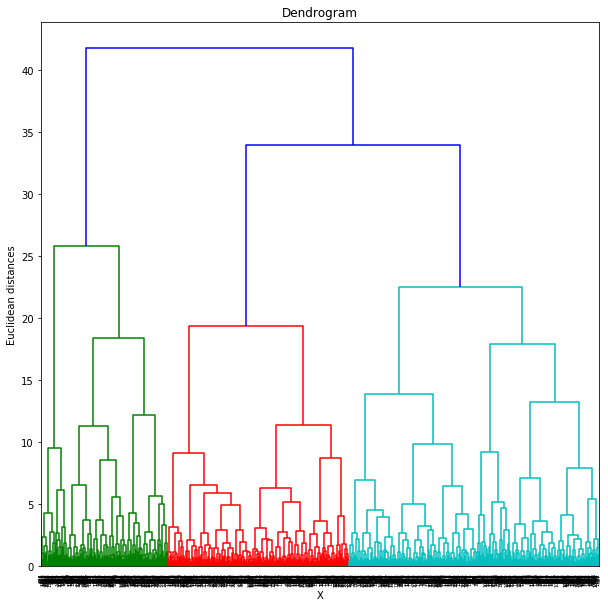

In [25]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(fmodelling_data, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('X')
plt.ylabel('Euclidean distances')
plt.show()

In [27]:
from sklearn.cluster import AgglomerativeClustering
clt = AgglomerativeClustering(linkage="ward", affinity="euclidean", n_clusters=4)
model = clt.fit(fmodelling_data)
clusters = pd.DataFrame(model.fit_predict(fmodelling_data))
train_data["Agglomerative 4"] = clusters
train_data["Agglomerative 4"].value_counts()

0    593
2    431
1    238
3     63
Name: Agglomerative 4, dtype: int64

In [28]:
train_data.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,...,time_of_week_driven,time_driven,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0,Agglomerative 3,Agglomerative 4
0,13,1.94,0.610934,HBACK,2,F,C,2,petrol,73,...,weekday,12am - 6 am,12,641.125045,0,1,1,209.047053,2,2
1,49,1.79,0.466995,HBACK,2,F,C,3,dissel,70,...,weekday,12am - 6 am,6,650.545430,1,1,1,1586.249277,1,0
2,79,0.86,0.256492,HBACK,3,F,C,4,petrol,144,...,weekday,12pm - 6pm,6,646.207341,0,1,1,212.451560,1,0
3,86,1.74,0.878268,OTHER,3,F,A,1,dissel,229,...,weekday,6am - 12pm,12,639.735985,1,1,2,2463.345293,1,0
4,94,1.22,0.294661,SEDAN,3,F,B,5,electric,100,...,weekday,6am - 12pm,6,656.176685,0,1,1,232.366733,2,2


In [29]:
train_data.to_excel(r"Membership solutions/Agglomerative vehvalue exp maxpo driv.xlsx",index=False)

In [25]:
train_data.head()

,id,veh_value,exposure,veh_body,veh_age,gender,area,agecat,engine_type,max_power,...,trm_len,credit_score,high_education_ind,clm,numclaims,claimcst0,claimcst0.1,Agglomerative 3,Agglomerative 4,Agglomerative 5
0,13,1.94,0.610934,HBACK,2,F,C,2,petrol,73,...,12,641.125045,0,1,1,209.047053,209.047053,1,0,1
1,49,1.79,0.466995,HBACK,2,F,C,3,dissel,70,...,6,650.545430,1,1,1,1586.249277,1586.249277,1,0,4
2,79,0.86,0.256492,HBACK,3,F,C,4,petrol,144,...,6,646.207341,0,1,1,212.451560,212.451560,1,0,1
3,86,1.74,0.878268,OTHER,3,F,A,1,dissel,229,...,12,639.735985,1,1,2,2463.345293,1231.672646,2,2,2
4,88,3.15,0.659426,OTHER,1,M,F,4,hybrid,240,...,12,659.211301,0,1,1,33895.135760,33895.135760,0,1,0


In [76]:
train_data['Agglomerative 4'].value_counts()

0    593
2    431
1    238
3     63
Name: Agglomerative 4, dtype: int64